In [5]:
!pip install transformers

In [1]:
# Upgrade TensorFlow and Transformers to their latest versions
!pip install --upgrade tensorflow transformers


In [2]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch

In [3]:
from PIL import Image
import requests

In [4]:
image = Image.open("high_res_image.png")

In [5]:
processor = DetrImageProcessor.from_pretrained("TahaDouaji/detr-doc-table-detection")
model = DetrForObjectDetection.from_pretrained("TahaDouaji/detr-doc-table-detection")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/274 [00:00<?, ?B/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/166M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at TahaDouaji/detr-doc-table-detection were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Detected table with confidence 0.965 at location [1645.6, 2249.74, 2372.54, 2858.99]


In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

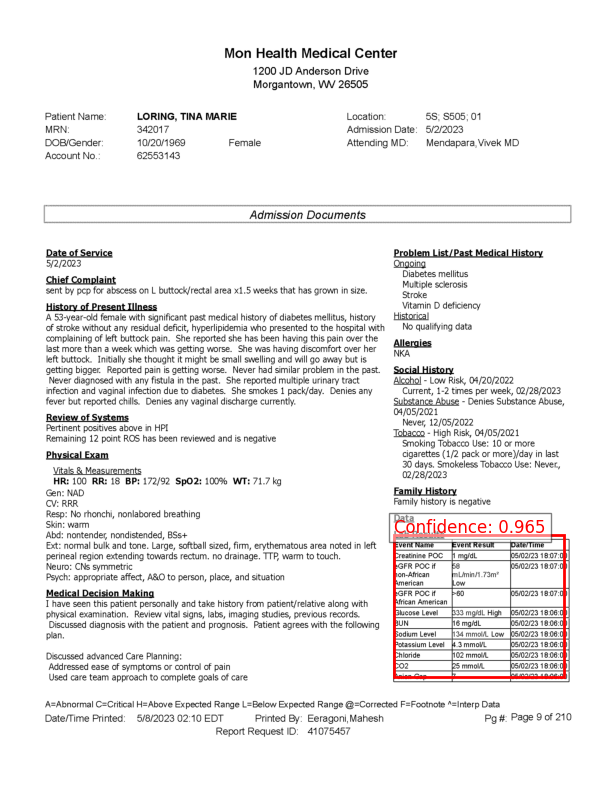

In [7]:
bbox = [1645.6, 2249.74, 2372.54, 2858.99]  # [x_min, y_min, x_max, y_max]
confidence = 0.965

# Create a plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image)

# Draw the bounding box
x_min, y_min, x_max, y_max = bbox
width = x_max - x_min
height = y_max - y_min
rect = patches.Rectangle(
    (x_min, y_min), width, height,
    linewidth=2, edgecolor='r', facecolor='none', label=f"Confidence: {confidence:.3f}"
)
ax.add_patch(rect)

# Add confidence as text
ax.text(x_min, y_min - 10, f"Confidence: {confidence:.3f}", color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Show the image
plt.axis('off')
plt.show()